In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

# **Dataset Auto**

In [86]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/datasets/DeepLearning/auto.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [88]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# **Data Engineering**

In [89]:
dataset.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', ' engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [90]:
dataset.drop(columns=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'curb-weight', 'engine-type','num-of-cylinders', ' engine-size', 'fuel-system',
       'horsepower','city-mpg',
       'highway-mpg',],axis=1,inplace=True)

In [91]:
dataset.replace('?',np.nan,inplace=True) 

In [92]:
dataset.isnull().sum().sort_values()

wheel-base           0
length               0
width                0
height               0
compression-ratio    0
peak-rpm             2
bore                 4
stroke               4
price                4
dtype: int64

In [93]:
list_col_nan=['peak-rpm','bore','stroke']

for i in list_col_nan:
    mean = dataset[i].astype(float).mean(axis=0)
    dataset[i].replace(np.nan,mean,inplace=True) 

dataset.dropna(subset=['price'],inplace=True,axis=0)


In [94]:
dataset.isnull().sum().sort_values()

wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
price                0
dtype: int64

In [95]:
dataset[["bore", "stroke","price","peak-rpm"]] = dataset[["bore", "stroke","price","peak-rpm"]].astype("float")
dataset.dtypes

wheel-base           float64
length               float64
width                float64
height               float64
bore                 float64
stroke               float64
compression-ratio    float64
peak-rpm             float64
price                float64
dtype: object

In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         201 non-null    float64
 1   length             201 non-null    float64
 2   width              201 non-null    float64
 3   height             201 non-null    float64
 4   bore               201 non-null    float64
 5   stroke             201 non-null    float64
 6   compression-ratio  201 non-null    float64
 7   peak-rpm           201 non-null    float64
 8   price              201 non-null    float64
dtypes: float64(9)
memory usage: 15.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ebe4b32e8>,
      dtype=object)

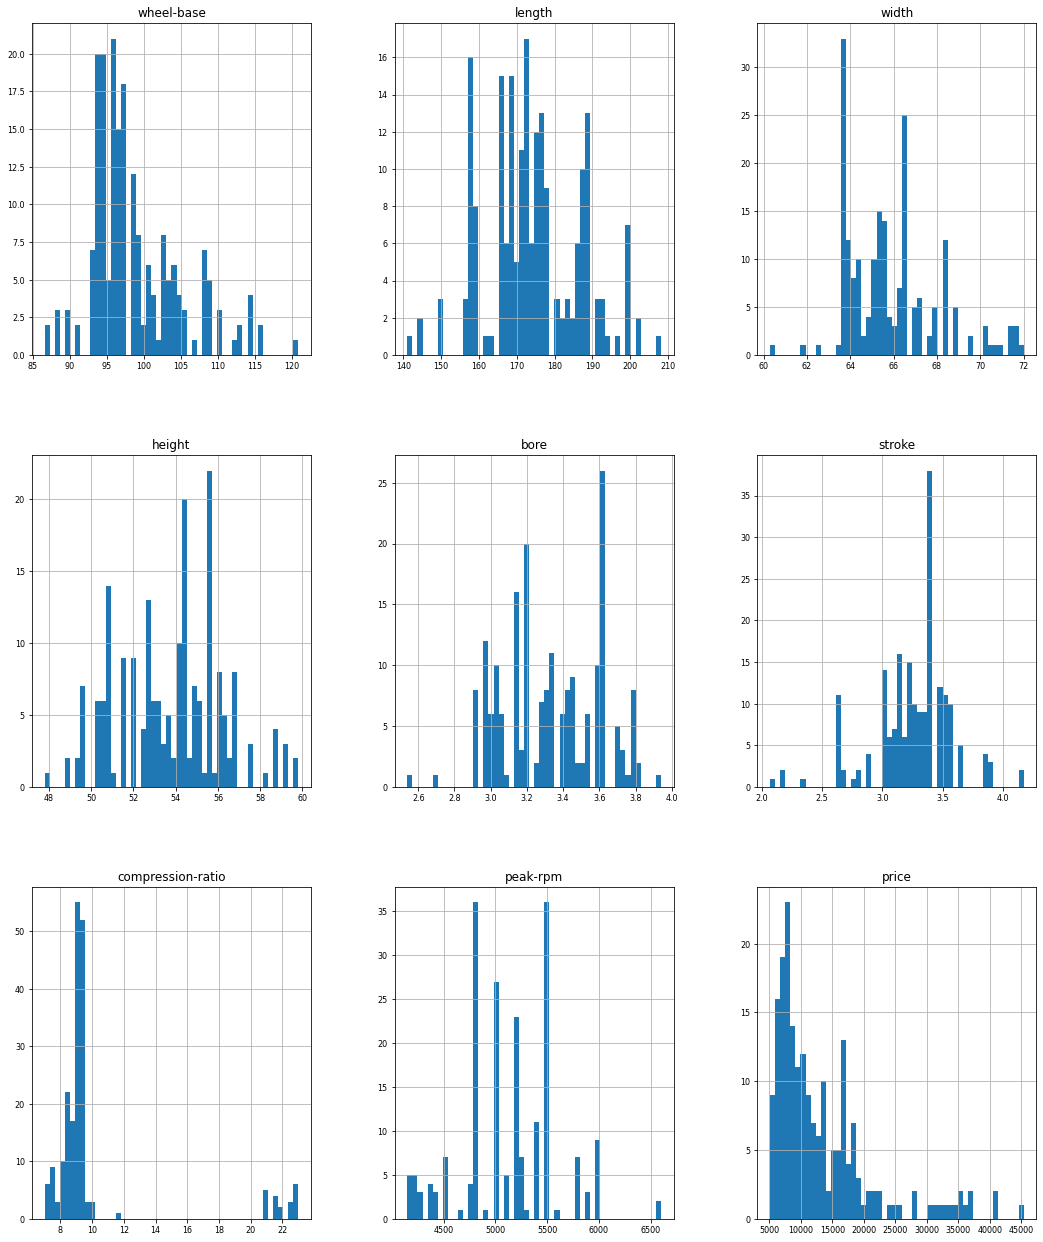

In [97]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

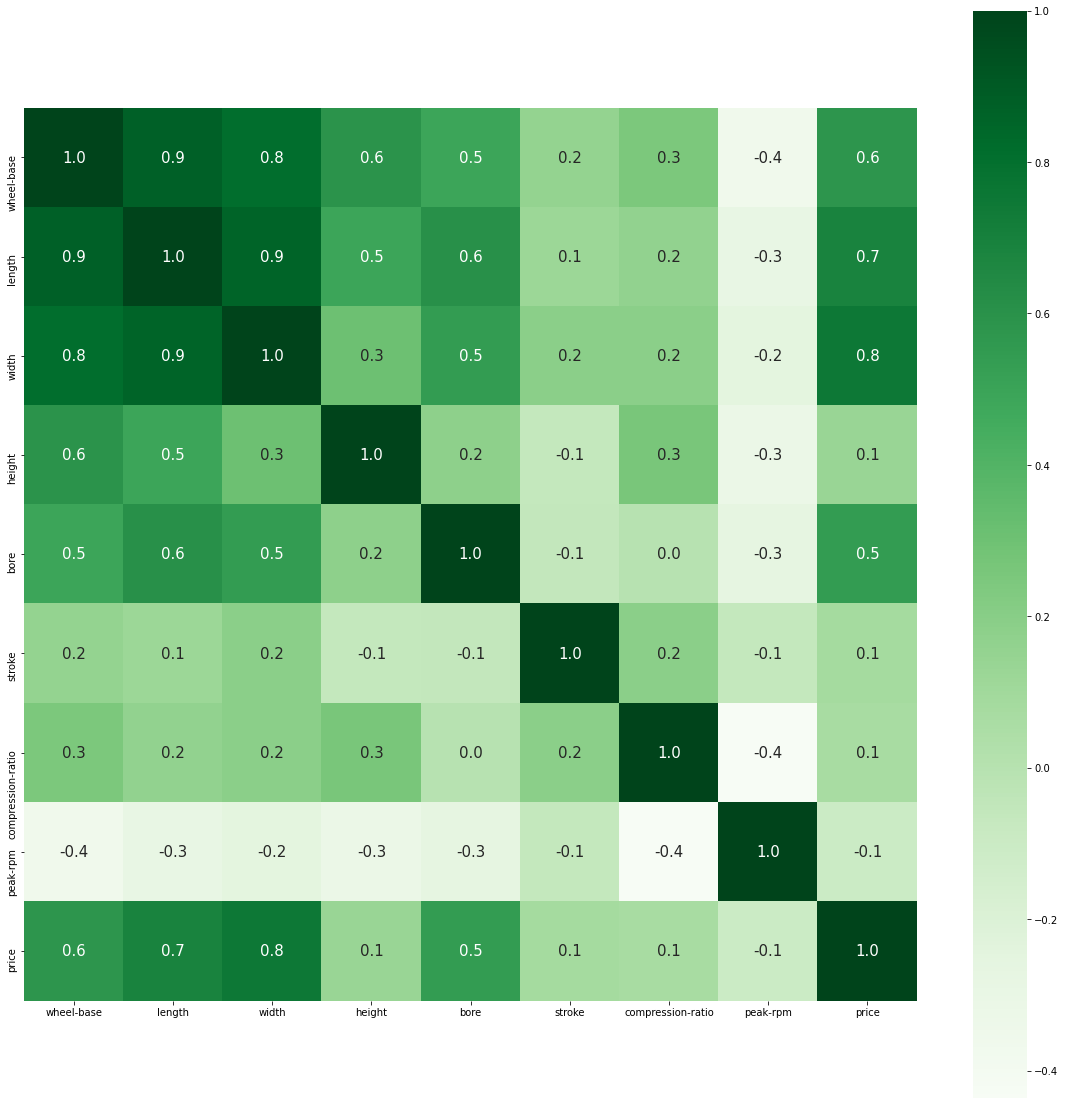

In [98]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [99]:
len(dataset.columns)

9

# **Linear Regression**

## **Feature Engineering**

In [100]:
label = dataset['price']
features = dataset.drop(['price'], axis=1)

scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [101]:
linear_reg = LinearRegression()
linear_reg.fit(feature_train, label_train)

predictions = linear_reg.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.244769250439587
MAE (Mean Absolute Error) 0.37372756360580484
r^2 score 0.6582019578480833
RMSE (Root Mean Squared Error 0.49474159966550924


## **Base Model DL**

In [102]:
model = Sequential()
model.add(Dense(8,input_dim=8, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [103]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 6ms/step - loss: 1.0631 - val_loss: 0.7094
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0387 - val_loss: 0.6941
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0046 - val_loss: 0.6719
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9530 - val_loss: 0.6419
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8792 - val_loss: 0.6072
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7987 - val_loss: 0.5695
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7080 - val_loss: 0.5393
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6356 - val_loss: 0.5150
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5708 - val_loss: 0.4959
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5272 - val_loss: 0.4844
Epoch 11/50
20/20 [

In [104]:
predictions = model.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.23719081809220371
MAE (Mean Absolute Error) 0.3605994802204901
r^2 score 0.6687845507769925
RMSE (Root Mean Squared Error 0.4870223999901891


## **Deeper Model DL**

In [105]:
deeper_model = Sequential()
deeper_model.add(Dense(8,input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 6ms/step - loss: 1.0696 - val_loss: 0.7193
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0634 - val_loss: 0.7168
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0487 - val_loss: 0.7095
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 1.0159 - val_loss: 0.6939
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.9522 - val_loss: 0.6705
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8713 - val_loss: 0.6449
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7756 - val_loss: 0.6316
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7140 - val_loss: 0.6258
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6684 - val_loss: 0.6135
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6417 - val_loss: 0.6045
Epoch 11/50
20/20 [

In [106]:
predictions = deeper_model.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.17655822123920167
MAE (Mean Absolute Error) 0.35637976713269254
r^2 score 0.7534524690621678
RMSE (Root Mean Squared Error 0.42018831640016086


## **Wider Model DL**

In [107]:
wider_model = Sequential()
wider_model.add(Dense(20,input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0654 - val_loss: 0.6997
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0069 - val_loss: 0.6651
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9414 - val_loss: 0.6239
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8567 - val_loss: 0.5775
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7523 - val_loss: 0.5330
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6542 - val_loss: 0.4952
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5608 - val_loss: 0.4745
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5043 - val_loss: 0.4623
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4650 - val_loss: 0.4495
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4432 - val_loss: 0.4400
Epoch 11/

In [108]:
predictions = wider_model.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.21588924623907124
MAE (Mean Absolute Error) 0.33278814050564487
r^2 score 0.6985302624670158
RMSE (Root Mean Squared Error 0.4646388341917529


In [109]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [110]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,1.065448,0.699660,0
1,1.006918,0.665117,1
2,0.941373,0.623923,2
3,0.856673,0.577532,3
4,0.752271,0.533043,4
...,...,...,...
95,0.159748,0.222073,95
96,0.159865,0.218613,96
97,0.159844,0.218168,97
98,0.156622,0.221591,98


In [111]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
99,0.157393,0.215889,99
97,0.159844,0.218168,97
92,0.161418,0.218195,92
96,0.159865,0.218613,96
94,0.159353,0.219341,94
...,...,...,...
4,0.752271,0.533043,4
3,0.856673,0.577532,3
2,0.941373,0.623923,2
1,1.006918,0.665117,1


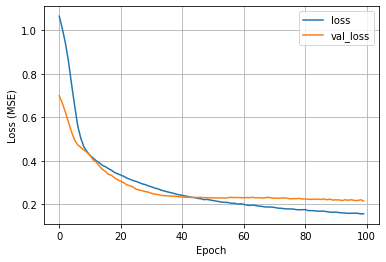

In [112]:
plot_loss(history) # epoch vs loss graph

### **Optimizer SGD**

In [113]:
wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [114]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0539 - val_loss: 0.7053
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0104 - val_loss: 0.6833
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9465 - val_loss: 0.6493
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8528 - val_loss: 0.6063
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7321 - val_loss: 0.5578
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6265 - val_loss: 0.5128
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5383 - val_loss: 0.4777
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4864 - val_loss: 0.4457
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4515 - val_loss: 0.4170
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4264 - val_loss: 0.3976
Epoch 11/

In [115]:
predictions = wider_model_tuned.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.16116812462693447
MAE (Mean Absolute Error) 0.2957762488155264
r^2 score 0.7749433421238562
RMSE (Root Mean Squared Error 0.40145750039940026


In [116]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
98,0.168156,0.159502,98
99,0.168298,0.161168,99
96,0.170058,0.161586,96
92,0.171580,0.162230,92
94,0.169577,0.162574,94
...,...,...,...
4,0.732097,0.557831,4
3,0.852754,0.606334,3
2,0.946482,0.649275,2
1,1.010401,0.683326,1


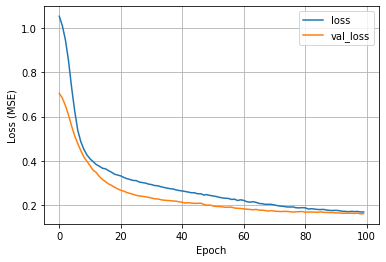

In [117]:
plot_loss(history_tuned) # epoch vs loss graph

### **Optimizer RMSprop**

In [118]:
wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 21        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [119]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.0499 - val_loss: 0.6913
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9859 - val_loss: 0.6579
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9107 - val_loss: 0.6176
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8229 - val_loss: 0.5727
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7289 - val_loss: 0.5286
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6446 - val_loss: 0.4959
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5805 - val_loss: 0.4747
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5326 - val_loss: 0.4592
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4982 - val_loss: 0.4494
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4738 - val_loss: 0.4401
Epoch 11/

In [120]:
predictions = wider_model_rmsprop.predict(feature_test)
predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.17643450293947283
MAE (Mean Absolute Error) 0.30737944639874837
r^2 score 0.7536252304386468
RMSE (Root Mean Squared Error 0.42004107291962867


In [121]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
99,0.190774,0.176435,99
97,0.191599,0.177085,97
98,0.192126,0.177533,98
95,0.195821,0.177912,95
96,0.195101,0.178174,96
...,...,...,...
4,0.728874,0.528615,4
3,0.822851,0.572669,3
2,0.910725,0.617613,2
1,0.985902,0.657934,1


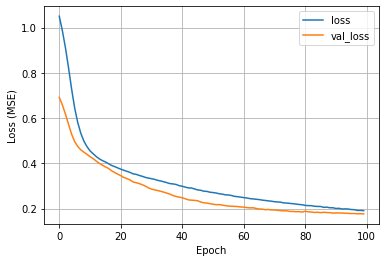

In [122]:
plot_loss(history_rmsprop) # epoch vs loss graph

# **Kesimpulan**


```
linear regression r^2 score 0.6582019578480833
Base Model DL r^2 score 0.6687845507769925
Deeper Model DL r^2 score 0.7534524690621678
Wider Model DL r^2 score 0.6985302624670158
Opt SGD r^2 score 0.7749433421238562
Opt RMSProp r^2 score 0.7536252304386468
```

Menurut hasil sekali run diatas Hasil yang di dapat untuk r^2 terbaik ada pada wider model dengan optimizer SGD 